In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from pandas.api.types import is_string_dtype, is_numeric_dtype
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

np.set_printoptions(precision=3, suppress=True)

In [ ]:
# from keras.layers import Input, Activation, Dense

In [2]:
tf.__version__

'2.3.0'

In [3]:
raw_dataset = pd.read_csv("features.csv", na_values='?'
                          , comment='\t'
                          , skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()

In [5]:
dataset.isna().sum()

kost_name_rough    0
kota               0
type_kos           0
area               0
facility_score     0
harga_nomina       0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
def train_cats(df):
	for n,c in df.items():
	    if is_string_dtype(c): 
	        df[n] = c.astype('category').cat.as_ordered()

In [8]:
train_cats(dataset)

In [9]:
dataset.drop(['kost_name_rough'], axis=1, inplace=True)

In [10]:
max_n_cat = None

In [11]:
for n,c in dataset.items(): 
    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
        dataset[n] = c.cat.codes+1

In [12]:
print(list(dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))
print(list(raw_dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))

print(list(dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))
print(list(raw_dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))

print(list(dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))
print(list(raw_dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))

[1, 2, 3, 4, 5, 6]
['bandung', 'jakarta', 'jogja', 'malang', 'semarang', 'surabaya']
[1, 2, 3]
['campur', 'putra', 'putri']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
['arcamanik', 'babakan ciparay', 'bandung kidul', 'bandung wetan', 'bantul', 'banyumanik', 'batu', 'batununggal', 'blimbing', 'bojongloa kidul', 'buahbatu', 'cibeunying kaler', 'cicendo', 'cidadap', 'cilandak', 'coblong', 'depok', 'dukuhpakis', 'duren sawit', 'gajahmungkur', 'gambir', 'gayungan', 'gedong tengen', 'genuk', 'godean', 'gondokusuman', 'gondomanan', 'grogol petamburan', 'gubeng', 'gunung anyar', 'jatinangor', 'jetis', 'karang pilang', 'kelapa gading', 'kepanjen', 'klojen', 'koja', 'lengkong', 'lowokwaru', 'mantrijeron', 'mergangsan', 'mlati', 'mulyorejo', 'n

In [13]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

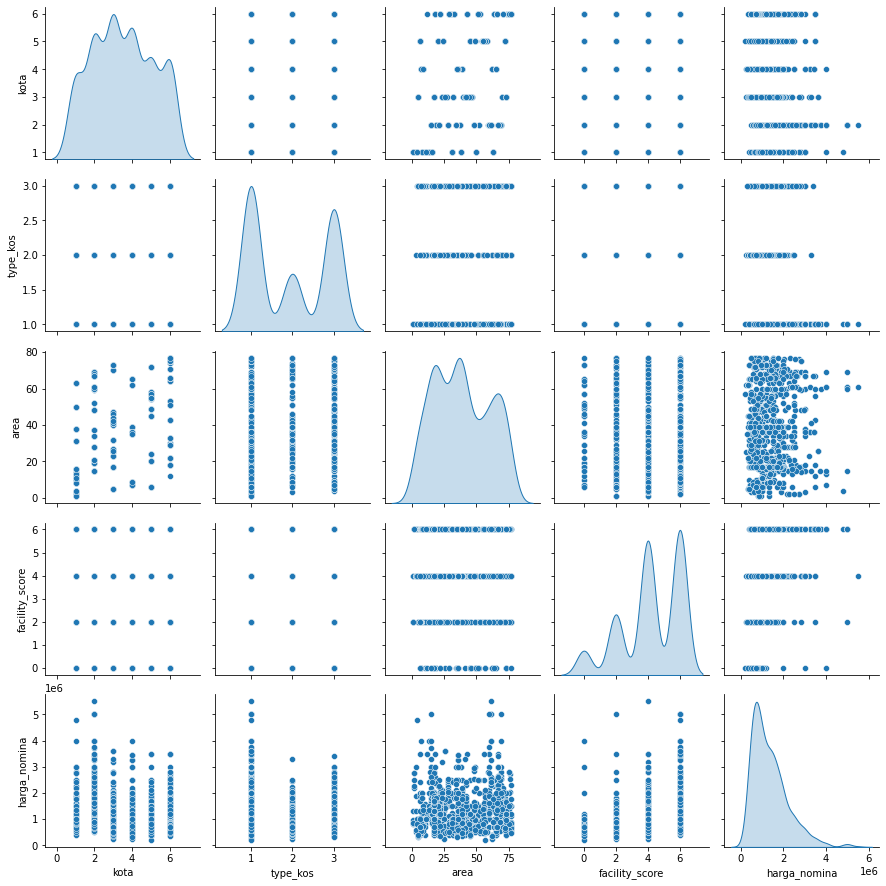

In [15]:
sns.pairplot(train_dataset, diag_kind='kde')

In [16]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kota,854.0,3.497658e+00,1.596264,1.0,2.00,3.0,5.0,6.0
type_kos,854.0,1.928571e+00,0.905009,1.0,1.00,2.0,3.0,3.0
area,854.0,3.858899e+01,21.421104,1.0,19.25,37.0,57.0,77.0
facility_score,854.0,4.196721e+00,1.814023,0.0,4.00,4.0,6.0,6.0
harga_nomina,854.0,1.363208e+06,846264.414360,200000.0,700000.00,1200000.0,1800000.0,5500000.0


In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('harga_nomina')
test_labels = test_features.pop('harga_nomina')

In [18]:
train_features

,kota,type_kos,area,facility_score
1066,4,3,39,6
549,4,2,62,2
103,5,1,20,4
759,4,2,39,4
453,1,2,11,6
...,...,...,...,...
1007,4,3,36,4
207,2,3,67,6
438,1,1,11,6
552,4,3,35,2


In [19]:
train_labels

1066    1200000
549      225000
103      900000
759      550000
453     1100000
         ...   
1007    1000000
207     2600000
438     1000000
552      300000
274     4000000
Name: harga_nomina, Length: 854, dtype: int64

In [20]:
normalizer = preprocessing.Normalization()

In [21]:
normalizer.adapt(np.array(train_features))

In [22]:
print(normalizer.mean.numpy())

[ 3.498  1.929 38.589  4.197]


In [23]:
train_features[:5]

,kota,type_kos,area,facility_score
1066,4,3,39,6
549,4,2,62,2
103,5,1,20,4
759,4,2,39,4
453,1,2,11,6


In [24]:
first = np.array(train_features[:1])

In [25]:
print(normalizer.mean.numpy())

[ 3.498  1.929 38.589  4.197]


In [26]:
with np.printoptions(precision=2, suppress=True):
  print(first)
  print(normalizer(first).numpy())
  # print(normalizer(second).numpy())

[[ 4  3 39  6]]
[[0.31 1.18 0.02 0.99]]


In [30]:
np.shape(np.array(train_features))

(854, 4)

In [31]:
model = keras.Sequential([
                            layers.Input(shape=(4,)),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [39]:
# np.array(train_labels)

In [45]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 4.94 s, sys: 596 ms, total: 5.53 s
Wall time: 4.84 s


In [46]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Error [harga_nomina]')
    plt.legend()
    plt.grid(True)

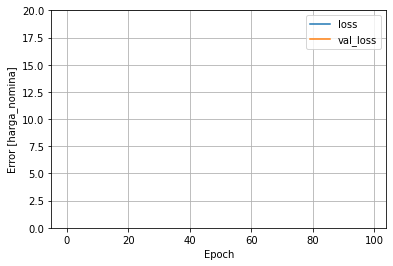

In [47]:
plot_loss(history)

In [48]:
test_result = model.evaluate(
    test_features, 
    test_labels,
    verbose=0
)

In [49]:
%%time
history=model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2,
    epochs=1000
)

Epoch 1/1000
22/22 - 0s - loss: 626968.4375 - val_loss: 605000.7500
Epoch 2/1000
22/22 - 0s - loss: 626346.8750 - val_loss: 604777.5000
Epoch 3/1000
22/22 - 0s - loss: 625747.4375 - val_loss: 604678.6250
Epoch 4/1000
22/22 - 0s - loss: 624954.6250 - val_loss: 603937.9375
Epoch 5/1000
22/22 - 0s - loss: 624399.1875 - val_loss: 603477.3125
Epoch 6/1000
22/22 - 0s - loss: 623704.8750 - val_loss: 603515.5000
Epoch 7/1000
22/22 - 0s - loss: 623265.5000 - val_loss: 603590.8125
Epoch 8/1000
22/22 - 0s - loss: 622433.3750 - val_loss: 603222.7500
Epoch 9/1000
22/22 - 0s - loss: 621787.6250 - val_loss: 602670.3750
Epoch 10/1000
22/22 - 0s - loss: 621081.9375 - val_loss: 602478.5000
Epoch 11/1000
22/22 - 0s - loss: 620427.8125 - val_loss: 602027.0000
Epoch 12/1000
22/22 - 0s - loss: 619793.0625 - val_loss: 601565.9375
Epoch 13/1000
22/22 - 0s - loss: 619101.5000 - val_loss: 601368.2500
Epoch 14/1000
22/22 - 0s - loss: 618499.9375 - val_loss: 601032.0625
Epoch 15/1000
22/22 - 0s - loss: 617993.750

Epoch 120/1000
22/22 - 0s - loss: 568278.6250 - val_loss: 593522.3750
Epoch 121/1000
22/22 - 0s - loss: 568316.7500 - val_loss: 593518.3125
Epoch 122/1000
22/22 - 0s - loss: 567936.4375 - val_loss: 593672.1875
Epoch 123/1000
22/22 - 0s - loss: 567687.6875 - val_loss: 593724.6250
Epoch 124/1000
22/22 - 0s - loss: 567935.3750 - val_loss: 594067.2500
Epoch 125/1000
22/22 - 0s - loss: 567385.0000 - val_loss: 594036.5000
Epoch 126/1000
22/22 - 0s - loss: 567282.2500 - val_loss: 594127.9375
Epoch 127/1000
22/22 - 0s - loss: 567042.5625 - val_loss: 594282.3125
Epoch 128/1000
22/22 - 0s - loss: 566985.7500 - val_loss: 594505.6250
Epoch 129/1000
22/22 - 0s - loss: 566698.0625 - val_loss: 594382.6250
Epoch 130/1000
22/22 - 0s - loss: 566665.1250 - val_loss: 594452.5625
Epoch 131/1000
22/22 - 0s - loss: 566483.3750 - val_loss: 594310.3125
Epoch 132/1000
22/22 - 0s - loss: 566284.5000 - val_loss: 594351.3750
Epoch 133/1000
22/22 - 0s - loss: 566077.7500 - val_loss: 594491.8750
Epoch 134/1000
22/22

22/22 - 0s - loss: 558857.7500 - val_loss: 587792.5625
Epoch 238/1000
22/22 - 0s - loss: 558862.9375 - val_loss: 587612.5000
Epoch 239/1000
22/22 - 0s - loss: 558816.8750 - val_loss: 587512.6250
Epoch 240/1000
22/22 - 0s - loss: 558765.5625 - val_loss: 587323.5000
Epoch 241/1000
22/22 - 0s - loss: 558768.7500 - val_loss: 587276.8750
Epoch 242/1000
22/22 - 0s - loss: 558620.3125 - val_loss: 586978.8750
Epoch 243/1000
22/22 - 0s - loss: 558890.5000 - val_loss: 586690.8750
Epoch 244/1000
22/22 - 0s - loss: 558627.3125 - val_loss: 586599.7500
Epoch 245/1000
22/22 - 0s - loss: 558600.8750 - val_loss: 586612.9375
Epoch 246/1000
22/22 - 0s - loss: 558511.1250 - val_loss: 586833.9375
Epoch 247/1000
22/22 - 0s - loss: 558520.7500 - val_loss: 586744.9375
Epoch 248/1000
22/22 - 0s - loss: 558458.1250 - val_loss: 586954.0625
Epoch 249/1000
22/22 - 0s - loss: 558387.3125 - val_loss: 586800.8125
Epoch 250/1000
22/22 - 0s - loss: 558351.7500 - val_loss: 586711.1875
Epoch 251/1000
22/22 - 0s - loss: 5

Epoch 355/1000
22/22 - 0s - loss: 554338.0625 - val_loss: 581040.9375
Epoch 356/1000
22/22 - 0s - loss: 554228.1250 - val_loss: 580805.6250
Epoch 357/1000
22/22 - 0s - loss: 554285.6250 - val_loss: 580646.0625
Epoch 358/1000
22/22 - 0s - loss: 554251.1250 - val_loss: 580403.5625
Epoch 359/1000
22/22 - 0s - loss: 554174.5625 - val_loss: 580562.1250
Epoch 360/1000
22/22 - 0s - loss: 554298.5000 - val_loss: 580979.4375
Epoch 361/1000
22/22 - 0s - loss: 554108.1875 - val_loss: 580596.2500
Epoch 362/1000
22/22 - 0s - loss: 554074.3125 - val_loss: 580607.3125
Epoch 363/1000
22/22 - 0s - loss: 554108.3125 - val_loss: 580426.1875
Epoch 364/1000
22/22 - 0s - loss: 553973.2500 - val_loss: 580522.6875
Epoch 365/1000
22/22 - 0s - loss: 554002.3125 - val_loss: 580340.0000
Epoch 366/1000
22/22 - 0s - loss: 554013.0000 - val_loss: 580312.0625
Epoch 367/1000
22/22 - 0s - loss: 553934.9375 - val_loss: 580027.8750
Epoch 368/1000
22/22 - 0s - loss: 553952.0625 - val_loss: 579865.7500
Epoch 369/1000
22/22

22/22 - 0s - loss: 551187.1875 - val_loss: 577497.7500
Epoch 473/1000
22/22 - 0s - loss: 551179.6875 - val_loss: 577178.3125
Epoch 474/1000
22/22 - 0s - loss: 551184.1875 - val_loss: 577310.3750
Epoch 475/1000
22/22 - 0s - loss: 551073.0625 - val_loss: 577154.3125
Epoch 476/1000
22/22 - 0s - loss: 551043.6250 - val_loss: 576781.6875
Epoch 477/1000
22/22 - 0s - loss: 551096.1250 - val_loss: 576857.5625
Epoch 478/1000
22/22 - 0s - loss: 551020.1250 - val_loss: 576762.8750
Epoch 479/1000
22/22 - 0s - loss: 551031.6875 - val_loss: 576967.6875
Epoch 480/1000
22/22 - 0s - loss: 551043.6250 - val_loss: 576916.0625
Epoch 481/1000
22/22 - 0s - loss: 550920.4375 - val_loss: 576972.7500
Epoch 482/1000
22/22 - 0s - loss: 550995.2500 - val_loss: 576958.4375
Epoch 483/1000
22/22 - 0s - loss: 550920.3125 - val_loss: 576893.1875
Epoch 484/1000
22/22 - 0s - loss: 550897.8125 - val_loss: 576871.4375
Epoch 485/1000
22/22 - 0s - loss: 550836.9375 - val_loss: 577085.9375
Epoch 486/1000
22/22 - 0s - loss: 5

Epoch 590/1000
22/22 - 0s - loss: 547899.7500 - val_loss: 573304.2500
Epoch 591/1000
22/22 - 0s - loss: 547859.1875 - val_loss: 573414.2500
Epoch 592/1000
22/22 - 0s - loss: 547796.2500 - val_loss: 573384.0625
Epoch 593/1000
22/22 - 0s - loss: 547780.5000 - val_loss: 573384.6250
Epoch 594/1000
22/22 - 0s - loss: 547760.9375 - val_loss: 573579.0625
Epoch 595/1000
22/22 - 0s - loss: 547740.0000 - val_loss: 573610.3750
Epoch 596/1000
22/22 - 0s - loss: 547727.0625 - val_loss: 573595.5000
Epoch 597/1000
22/22 - 0s - loss: 547741.4375 - val_loss: 573448.4375
Epoch 598/1000
22/22 - 0s - loss: 547641.1250 - val_loss: 573444.1875
Epoch 599/1000
22/22 - 0s - loss: 547737.9375 - val_loss: 573278.4375
Epoch 600/1000
22/22 - 0s - loss: 547705.3750 - val_loss: 573437.3125
Epoch 601/1000
22/22 - 0s - loss: 547631.0625 - val_loss: 573135.5625
Epoch 602/1000
22/22 - 0s - loss: 547648.0625 - val_loss: 573377.8750
Epoch 603/1000
22/22 - 0s - loss: 547650.8125 - val_loss: 573355.5000
Epoch 604/1000
22/22

22/22 - 0s - loss: 545320.5000 - val_loss: 570908.0000
Epoch 708/1000
22/22 - 0s - loss: 545317.7500 - val_loss: 570787.8125
Epoch 709/1000
22/22 - 0s - loss: 545245.6875 - val_loss: 570937.8125
Epoch 710/1000
22/22 - 0s - loss: 545268.9375 - val_loss: 571007.6250
Epoch 711/1000
22/22 - 0s - loss: 545311.9375 - val_loss: 570814.5000
Epoch 712/1000
22/22 - 0s - loss: 545212.5625 - val_loss: 570799.1875
Epoch 713/1000
22/22 - 0s - loss: 545233.3125 - val_loss: 570854.9375
Epoch 714/1000
22/22 - 0s - loss: 545187.4375 - val_loss: 570934.6875
Epoch 715/1000
22/22 - 0s - loss: 545123.5625 - val_loss: 570716.2500
Epoch 716/1000
22/22 - 0s - loss: 545083.6250 - val_loss: 570653.8750
Epoch 717/1000
22/22 - 0s - loss: 545085.5000 - val_loss: 570509.5000
Epoch 718/1000
22/22 - 0s - loss: 545058.6250 - val_loss: 570645.6875
Epoch 719/1000
22/22 - 0s - loss: 545068.7500 - val_loss: 570565.4375
Epoch 720/1000
22/22 - 0s - loss: 544981.2500 - val_loss: 570753.1250
Epoch 721/1000
22/22 - 0s - loss: 5

Epoch 825/1000
22/22 - 0s - loss: 542515.3750 - val_loss: 568828.6250
Epoch 826/1000
22/22 - 0s - loss: 542399.2500 - val_loss: 568985.0625
Epoch 827/1000
22/22 - 0s - loss: 542350.6250 - val_loss: 568876.3125
Epoch 828/1000
22/22 - 0s - loss: 542385.3125 - val_loss: 568499.2500
Epoch 829/1000
22/22 - 0s - loss: 542259.3125 - val_loss: 568558.0000
Epoch 830/1000
22/22 - 0s - loss: 542188.8750 - val_loss: 568564.4375
Epoch 831/1000
22/22 - 0s - loss: 542172.4375 - val_loss: 568674.8125
Epoch 832/1000
22/22 - 0s - loss: 542177.9375 - val_loss: 568457.8750
Epoch 833/1000
22/22 - 0s - loss: 542426.5000 - val_loss: 568773.8750
Epoch 834/1000
22/22 - 0s - loss: 542104.1875 - val_loss: 568394.5000
Epoch 835/1000
22/22 - 0s - loss: 542187.8125 - val_loss: 568594.5000
Epoch 836/1000
22/22 - 0s - loss: 542082.3125 - val_loss: 568289.3125
Epoch 837/1000
22/22 - 0s - loss: 542079.5625 - val_loss: 568330.8750
Epoch 838/1000
22/22 - 0s - loss: 542003.1875 - val_loss: 568199.0000
Epoch 839/1000
22/22

22/22 - 0s - loss: 538983.0625 - val_loss: 565405.0625
Epoch 943/1000
22/22 - 0s - loss: 538914.0625 - val_loss: 565220.3750
Epoch 944/1000
22/22 - 0s - loss: 538757.5000 - val_loss: 565349.2500
Epoch 945/1000
22/22 - 0s - loss: 538723.5000 - val_loss: 565434.0000
Epoch 946/1000
22/22 - 0s - loss: 538685.1875 - val_loss: 565505.8750
Epoch 947/1000
22/22 - 0s - loss: 538705.1250 - val_loss: 565550.5625
Epoch 948/1000
22/22 - 0s - loss: 538688.8125 - val_loss: 565297.3750
Epoch 949/1000
22/22 - 0s - loss: 538689.0625 - val_loss: 565570.8750
Epoch 950/1000
22/22 - 0s - loss: 538614.0000 - val_loss: 565353.5625
Epoch 951/1000
22/22 - 0s - loss: 538516.5000 - val_loss: 565401.0000
Epoch 952/1000
22/22 - 0s - loss: 538517.7500 - val_loss: 565456.1250
Epoch 953/1000
22/22 - 0s - loss: 538473.5000 - val_loss: 565215.7500
Epoch 954/1000
22/22 - 0s - loss: 538485.8125 - val_loss: 565162.6875
Epoch 955/1000
22/22 - 0s - loss: 538386.9375 - val_loss: 565196.7500
Epoch 956/1000
22/22 - 0s - loss: 5

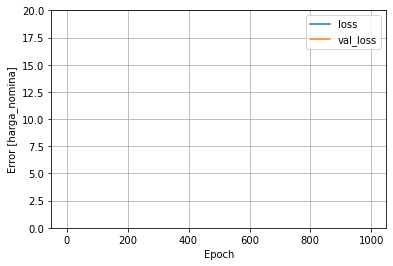

In [50]:
plot_loss(history)

In [51]:
test_result = model.evaluate(test_features,
                             test_labels,
                             verbose=0)

In [53]:
test_result

545136.0

In [54]:
test_features

,kota,type_kos,area,facility_score
11,5,3,57,4
19,5,3,57,4
23,5,3,49,6
25,5,2,49,0
28,5,1,72,4
...,...,...,...,...
1046,3,3,73,0
1047,3,3,5,4
1055,6,3,71,2
1058,4,3,65,6


In [56]:
test_labels

11       550000
19       850000
23      1200000
25       500000
28       750000
         ...   
1046     350000
1047     600000
1055     500000
1058     700000
1064     300000
Name: harga_nomina, Length: 214, dtype: int64

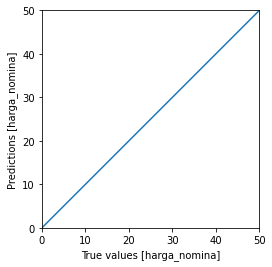

In [55]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [harga_nomina]')
plt.ylabel('Predictions [harga_nomina]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [58]:
test_predictions

array([1124319.1 , 1124319.1 , 1523792.1 ,  367241.97, 1325725.1 ,
       1685037.  , 1523792.1 ,  581094.4 , 1107888.4 ,  526769.2 ,
       1705501.5 ,  739624.8 , 1124319.1 , 1214419.2 ,  838101.3 ,
       1682929.4 , 1624216.5 ,  176854.14, 1094245.4 , 1106940.2 ,
        933000.3 ,  933000.3 ,  933000.3 , 1094245.4 , 1705501.5 ,
        554614.56,  554614.56,  885250.06, 1214419.2 ,  965872.56,
        418930.56,  885250.06, 1705501.5 , 1705501.5 , 1113892.6 ,
       1179513.6 , 1055720.2 ,  661232.25, 1055720.2 , 1872036.4 ,
       1385012.6 ,  724560.06,  643937.56,  643937.56,  506603.34,
       1268667.8 , 1385012.6 ,  506603.34, 1769714.4 ,  799442.94,
       1875447.  , 1844750.5 , 1844750.5 , 1844750.5 , 1062017.1 ,
       1694678.2 , 1694678.2 , 1202797.8 , 1267601.6 , 1759482.2 ,
       1267601.6 ,  289998.8 , 1267601.6 , 1267601.6 , 1759482.2 ,
       1798235.1 , 1717612.9 ,  888855.7 , 1807232.4 , 1658395.4 ,
       1807232.4 , 1577772.6 , 1658395.4 , 1658395.4 , 1228829

In [59]:
test_labels

11       550000
19       850000
23      1200000
25       500000
28       750000
         ...   
1046     350000
1047     600000
1055     500000
1058     700000
1064     300000
Name: harga_nomina, Length: 214, dtype: int64

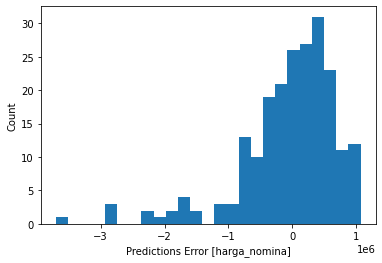

In [57]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions Error [harga_nomina]')
_ = plt.ylabel('Count')

In [60]:
model.save('getkos_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: getkos_model/assets


In [62]:
reloaded = tf.keras.models.load_model('getkos_model')

test_result = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

In [63]:
test_result

545136.0

In [64]:
converter = tf.lite.TFLiteConverter.from_saved_model('getkos_model')
tflite_model = converter.convert()

In [65]:
with open('model_getkos_regression.tflite', 'wb') as f:
    f.write(tflite_model)

In [66]:
test_features[3:4]

,kota,type_kos,area,facility_score
25,5,2,49,0


In [67]:
model.predict(np.array(test_features[3:4]))

array([[367241.94]], dtype=float32)

In [68]:
test_labels[3:4]

25    500000
Name: harga_nomina, dtype: int64

In [69]:
!ls

LICENSE                        model_getkos_regression.tflite
README.md                      modeling_get_kos.ipynb
SCRAPPINGDATA                  modeling_get_kos.py
cat_map.json                   nitip_eko_notes.md
dnn_model                      pre_processing.ipynb
features.csv                   pre_processing.py
getkos_model                   read_merge_dropdup_data.py
img_notes                      read_n_parse_data.py
merged_data - Sheet7.csv       read_n_parse_data_ndfilter.py
merged_data - data_choosen.csv tflearn_regression.ipynb
merged_kota_drop_dupl.csv      transform_1.csv
model_dnn_regression.tflite    transform_2.csv


In [ ]:
def proc_df(df, y_fld = 'harga_nomina', skip_flds=['kost_name_rough'],	na_dict = {}, max_n_cat = None):

	y = dataset[y_fld].values
	dataset.drop(skip_flds+[y_fld], axis=1, inplace=True)

	for n,c in dataset.items(): 
	    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
	        dataset[n] = c.cat.codes+1
	    
	res = [pd.get_dummies(dataset, dummy_na=True), y, na_dict]

	return res

In [ ]:
x, y, nas = proc_df(dataset, y_fld = 'harga_nomina', skip_flds=['kost_name_rough'],	na_dict = {}, max_n_cat = None)

In [ ]:
def get_dict_encode(df_1,df_2,col='kota'):
    
    zip_iterator = zip(
        list(df_1.groupby([col]).size().reset_index(name='counts')[col]), 
        list(df_2.groupby([col]).size().reset_index(name='counts')[col])
    )
    
    return dict(zip_iterator)

In [ ]:
dict_kota = get_dict_encode(raw_dataset,x,col='kota')
dict_type_kos = get_dict_encode(raw_dataset,x,col='type_kos')
dict_area = get_dict_encode(raw_dataset,x,col='area')

In [ ]:
cat_map = {"kota":dict_kota, "type_kos":dict_type_kos, "area":dict_area}

In [ ]:
with open('cat_map.json', 'w') as fp:
    json.dump(cat_map, fp)

In [ ]:
x

In [ ]:
y

In [ ]:
sns.pairplot(x, diag_kind='kde')

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)